In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
imp_without_raw = (
    pd.read_csv("rf-importances.csv")
        .sort_values(by="importances", ascending=False)
        .reset_index(drop=True)
)
imp_with_raw = pd.read_csv("rf-importances-with-psd-values.csv")


imp_with_raw = (
    pd.read_csv("rf-importances-with-psd-values.csv")
        .sort_values(by="importances", ascending=False)
        .reset_index(drop=True)
)

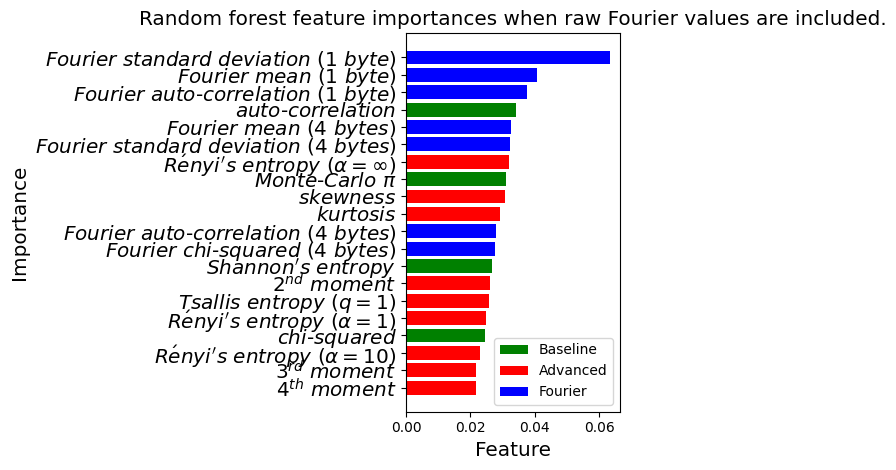

In [19]:
def plot(df, title):
    plt.xlabel('Feature', fontsize='x-large')
    plt.ylabel('Importance', fontsize='x-large')
    plt.title(title, fontsize='x-large')
    plt.yticks(fontsize="x-large")
    plt.barh(
        df["features"][::-1],
        df["importances"][::-1],
        color=df["colors"][::-1]
    )

# Create custom legend elements using Patch class
    legend_colors = ["green", "red", "blue"]
    legend_labels = ["Baseline", "Advanced", "Fourier"]
    legend_elements = [mpatches.Patch(facecolor=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Add the custom legend to the plot
    plt.legend(handles=legend_elements, loc='lower right')
    plt.tight_layout()

plot(imp_without_raw.head(20), title="Random forest feature importances when raw Fourier values are included.")

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Random forest feature importances when raw Fourier values are included.'}, xlabel='Feature', ylabel='Importance'>)

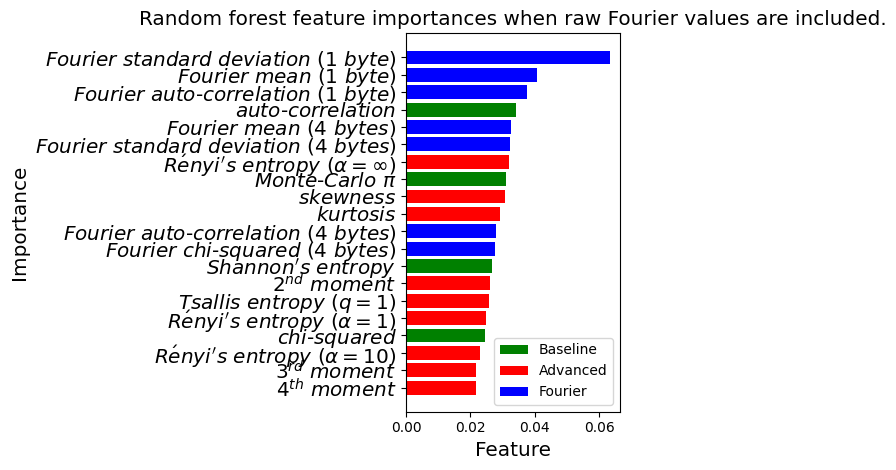

In [20]:
def plot_internal(ax, df, title):
    ax.set_xlabel('Feature', fontsize='x-large')
    ax.set_ylabel('Importance', fontsize='x-large')
    ax.set_title(title, fontsize='x-large')
    ax.tick_params(axis='y', labelsize="x-large")
    ax.barh(
        df1["features"][::-1],
        df1["importances"][::-1],
        color=df1["colors"][::-1]
    )

def plot(df1, title1, df2, title2):
    # Create a figure and axis object
    fig, ax = plt.subplots(1, 2)
    plot_internal(ax[0], df1, title1)
    plot_internal(ax[1], df2, title2)

    # Create custom legend elements using Patch class
    legend_colors = ["green", "red", "blue"]
    legend_labels = ["Baseline", "Advanced", "Fourier"]
    legend_elements = [mpatches.Patch(facecolor=color, label=label) for color, label in zip(legend_colors, legend_labels)]

    # Add the custom legend to the plot
    fig.legend(handles=legend_elements, loc='lower right')
    fig.tight_layout()

    # Return the figure and axis objects (optional)
    return fig, ax


plot(imp_without_raw.head(20), title1="Random forest feature importances when raw Fourier values are included.")

In [4]:
imp_without_raw

,Unnamed: 0,original_feature_name,features,importances,colors
0,0,fourier.stat.1byte.std,$Fourier$ $standard$ $deviation$ $(1$ $byte)$,6.334654e-02,blue
1,1,fourier.stat.1byte.mean,$Fourier$ ${mean}$ $(1$ $byte)$,4.062791e-02,blue
2,2,fourier.stat.1byte.autocorr,$Fourier$ $auto$-$correlation$ $(1$ $byte)$,3.772863e-02,blue
3,3,baseline.autocorrelation_full,$auto$-$correlation$,3.423071e-02,green
4,4,fourier.stat.4byte.mean,$Fourier$ ${mean}$ $(4$ $bytes)$,3.265501e-02,blue
...,...,...,...,...,...
75,75,fourier.stat.1byte.moment.12,$Fourier$ $12^{th}$ ${moment}$ $(1$ $byte)$,4.838318e-08,blue
76,76,fourier.stat.1byte.moment.14,$Fourier$ $14^{th}$ ${moment}$ $(1$ $byte)$,0.000000e+00,blue
77,77,fourier.stat.1byte.moment.11,$Fourier$ $11^{th}$ ${moment}$ $(1$ $byte)$,0.000000e+00,blue
78,78,fourier.stat.1byte.moment.15,$Fourier$ $15^{th}$ ${moment}$ $(1$ $byte)$,0.000000e+00,blue
